# Exploring Olympics Dataset - 120 years of data 

## 1. Download and Explore Dataset  

In [137]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from wordcloud import WordCloud

In [336]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


## 2. Import the dataset  

In [292]:
events = pd.read_csv('athlete_events.csv')

In [140]:
regions = pd.read_csv('noc_regions.csv')

In [380]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [293]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [294]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [295]:
events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## 3. Clean Data 

Replace NaN with mean for Age, Height and Weight

In [296]:
events['Age'].fillna(events['Age'].mean(),inplace = True)
events['Height'].fillna(events['Height'].mean(),inplace = True)
events['Weight'].fillna(events['Weight'].mean(),inplace = True)

## 4. Explore and understand the data  

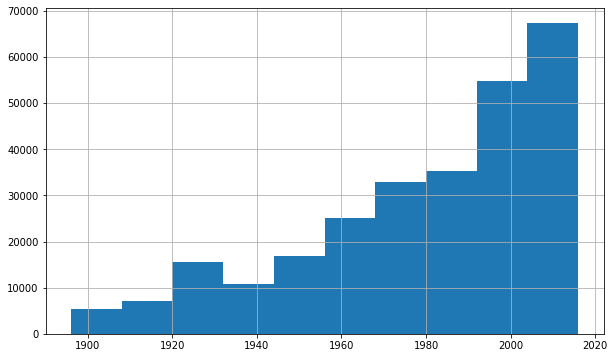

In [337]:
events.Year.hist()

In [376]:
pysqldf("SELECT Year, COUNT(*) as count FROM events GROUP BY YEAR ORDER BY Year")

,Year,count
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101
5,1912,4040
6,1920,4292
7,1924,5693
8,1928,5574
9,1932,3321


In [298]:
print("Start Year: ", events.Year.min())
print("End Year: ", events.Year.max())

Start Year:  1896
End Year:  2016


In [299]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


###  Generate the word cloud for sports

In [300]:
sports = set()
for s in events.Sport:
    sports.update(i for i in s.split('\n'))
print(sports)

{'Equestrianism', 'Water Polo', 'Bobsleigh', 'Art Competitions', 'Lacrosse', 'Freestyle Skiing', 'Fencing', 'Modern Pentathlon', 'Rugby Sevens', 'Wrestling', 'Diving', 'Tennis', 'Rhythmic Gymnastics', 'Ski Jumping', 'Boxing', 'Curling', 'Rugby', 'Handball', 'Basketball', 'Shooting', 'Baseball', 'Snowboarding', 'Table Tennis', 'Swimming', 'Nordic Combined', 'Short Track Speed Skating', 'Speed Skating', 'Beach Volleyball', 'Softball', 'Cross Country Skiing', 'Ice Hockey', 'Alpine Skiing', 'Taekwondo', 'Canoeing', 'Aeronautics', 'Tug-Of-War', 'Triathlon', 'Motorboating', 'Badminton', 'Luge', 'Polo', 'Volleyball', 'Judo', 'Cricket', 'Basque Pelota', 'Croquet', 'Hockey', 'Alpinism', 'Figure Skating', 'Golf', 'Rowing', 'Weightlifting', 'Football', 'Trampolining', 'Gymnastics', 'Athletics', 'Biathlon', 'Skeleton', 'Synchronized Swimming', 'Military Ski Patrol', 'Jeu De Paume', 'Sailing', 'Archery', 'Cycling', 'Roque', 'Racquets'}


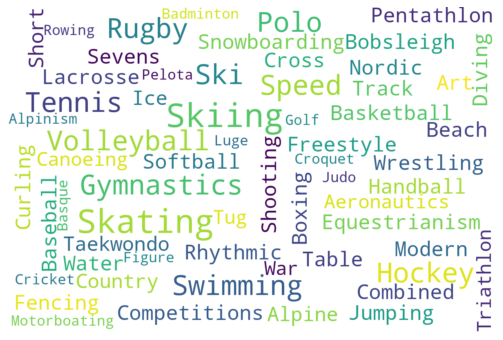

In [338]:
wc = WordCloud(
    background_color='white',
    width=1200,
    height=800,
    max_words=3000,
    random_state=200,
    min_font_size=35,
    max_font_size=80
)
wc.generate("，".join(sports))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [302]:
wc.to_file("wordcloud.png")

### The 20 countries with the most athletes

In [303]:
from pandasql import sqldf

In [304]:
pysqldf = lambda q: sqldf(q,globals())

In [305]:
pysqldf("SELECT * FROM events LIMIT 10")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [378]:
top20 = pysqldf("SELECT e.NOC, region, total_athletes FROM (SELECT NOC, COUNT(DISTINCT(ID)) AS total_athletes FROM events GROUP BY NOC) e INNER JOIN regions r ON e.NOC = r.NOC ORDER BY total_athletes DESC LIMIT 20" )

In [379]:
top20

,NOC,region,total_athletes
0,USA,USA,9653
1,GBR,UK,6281
2,FRA,France,6170
3,ITA,Italy,4935
4,GER,Germany,4872
5,CAN,Canada,4811
6,JPN,Japan,4067
7,AUS,Australia,3820
8,SWE,Sweden,3787
9,POL,Poland,2970


In [308]:
events20 = events[events['NOC'].isin(top20['NOC'])]

In [310]:
# double check
pysqldf("SELECT DISTINCT(NOC) FROM events20")

,NOC
0,CHN
1,NED
2,USA
3,FIN
4,FRA
5,ESP
6,ITA
7,RUS
8,URS
9,HUN


### Total number of athletes who have attended an Olympics 

In [311]:
pysqldf("SELECT COUNT(DISTINCT(ID)) as total_athletes FROM events")

,total_athletes
0,135571


Plot gender pie chart for all regions and the 20 regions with the most atheletes

### Gender analysis

In [312]:
gender_all_regions = pysqldf("SELECT Sex, COUNT(*) FROM (SELECT Sex FROM events GROUP BY ID) GROUP BY Sex")

In [313]:
gender_all_regions

,Sex,COUNT(*)
0,F,33981
1,M,101590


In [314]:
gender_top20_regions = pysqldf("SELECT Sex, COUNT(*) FROM (SELECT Sex FROM events20 GROUP BY ID) GROUP BY Sex")

In [315]:
gender_top20_regions

,Sex,COUNT(*)
0,F,20806
1,M,56760


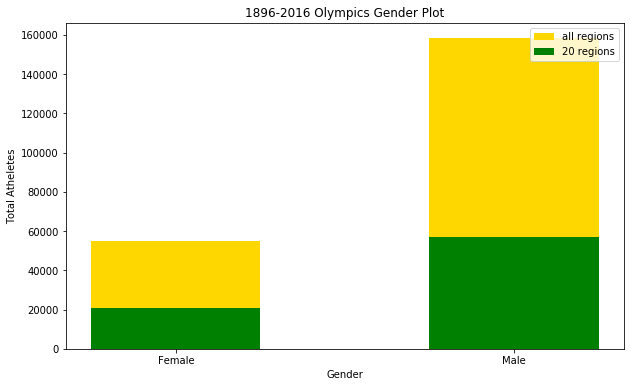

In [339]:
genders = ['Female', 'Male']
region20 = np.array([20806, 56760])
allregions = np.array([33981, 101590])
ind = [x for x, _ in enumerate(genders)]

plt.bar(ind, allregions, width=0.5, label='all regions', color='gold', bottom=region20)
plt.bar(ind, region20, width=0.5, label='20 regions', color='green')

plt.xticks(ind, genders)
plt.ylabel("Total Atheletes")
plt.xlabel("Gender")
plt.legend(loc="upper right")
plt.title("1896-2016 Olympics Gender Plot")

plt.show()

Age Analysis

In [317]:
agedf = pysqldf("SELECT Age, Sex FROM events GROUP BY ID")

In [318]:
age_f = pd.DataFrame(agedf[agedf['Sex'] == 'F'].Age).assign(Gender='Female')
age_m = pd.DataFrame(agedf[agedf['Sex'] == 'M'].Age).assign(Gender='Male')

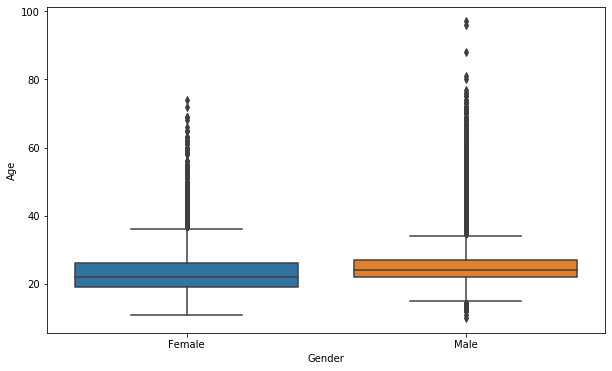

In [340]:
agedata = pd.concat([age_f,age_m])
mdf = pd.melt(agedata,id_vars = ['Gender'])
ax = sns.boxplot(x="Gender", y="Age", data=agedata)    
plt.show()

Average age change

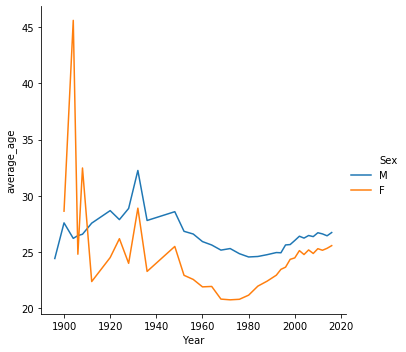

In [345]:
year_mean_age= pysqldf("SELECT avg(Age) as average_age, Sex, Year FROM events GROUP BY year, Sex")
ax = sns.relplot(x="Year", y="average_age", hue = "Sex", estimator=None, kind= "line", data=year_mean_age)  
plt.show()

Atheletes with Gold medal age distribution

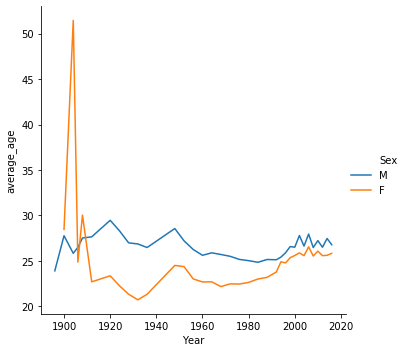

In [342]:
year_mean_age_medal = pysqldf("SELECT avg(Age) as average_age, Sex, Year FROM events WHERE Medal IS NOT NULL GROUP BY year, Sex")
ax = sns.relplot(x="Year", y="average_age", hue = "Sex", estimator=None, kind= "line", data=year_mean_age_medal)     
plt.show()

### TOP 20 Countries with the most Gold medal

In [350]:
country_medal = pysqldf("SELECT NOC, COUNT(Medal) as medals FROM events WHERE Medal == 'Gold' GROUP BY NOC ORDER BY medals DESC LIMIT 20")

In [356]:
country_medal = pysqldf("SELECT r.region as Country, medals FROM country_medal c INNER JOIN regions r on c.NOC = r.NOC")

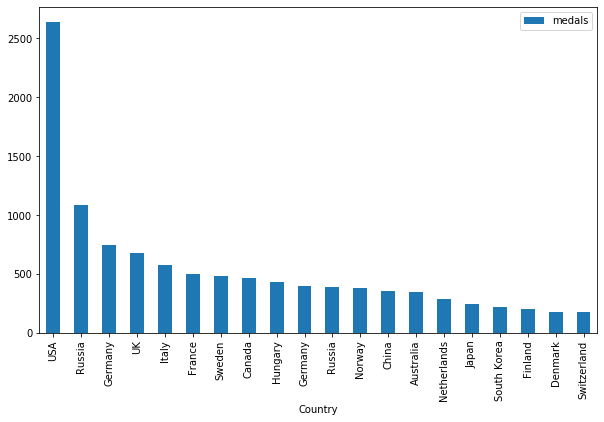

In [364]:
country_medal.plot.bar(x = 'Country', y = 'medals', rot=90)

### Hottest 30 Sports

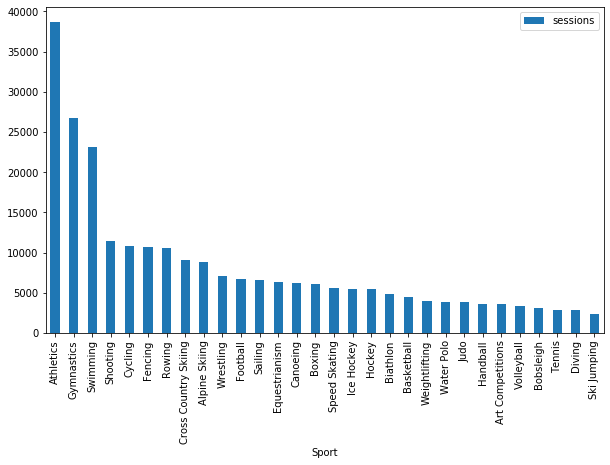

In [373]:
hot_sports = pysqldf("SELECT Sport, COUNT(*) AS sessions FROM events GROUP BY Sport ORDER BY sessions DESC LIMIT 30")
hot_sports.plot.bar(x = 'Sport', rot=90)

### Hottest 30 Sports in from 2000 to 2016

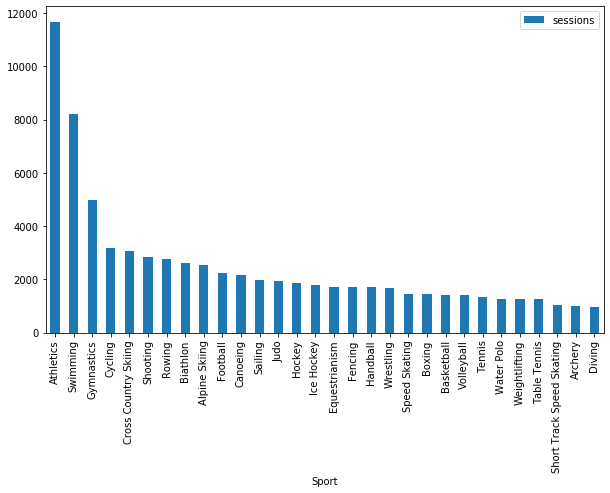

In [384]:
hot_sports_16 = pysqldf("SELECT Sport, COUNT(*) AS sessions FROM events WHERE Year>=2000 and Year<=2016 GROUP BY Sport ORDER BY sessions DESC LIMIT 30")
#hot_sports_16.plot.bar(x = 'Sport', rot=90)
fig = hot_sports_16.plot.bar(x = 'Sport', rot=90).get_figure()
fig.savefig("Hottest30sports",bbox_inches = 'tight')

### The strongest sport of the top 20 countries

In [390]:
pysqldf("SELECT Sport, Count(Medal) FROM events WHERE medal IS NOT NULL GROUP BY Sport ORDER BY COUNT(Medal) DESC LIMIT 20 ")

,Sport,Count(Medal)
0,Athletics,3969
1,Swimming,3048
2,Rowing,2945
3,Gymnastics,2256
4,Fencing,1743
5,Football,1571
6,Ice Hockey,1530
7,Hockey,1528
8,Wrestling,1296
9,Cycling,1263


In [391]:
pysqldf("SELECT Sport, Count(Medal) FROM events WHERE Year = 2016 AND medal IS NOT NULL GROUP BY Sport ORDER BY COUNT(Medal) DESC LIMIT 20 ")

,Sport,Count(Medal)
0,Athletics,192
1,Swimming,191
2,Rowing,144
3,Football,106
4,Hockey,99
5,Handball,89
6,Cycling,84
7,Canoeing,82
8,Water Polo,78
9,Rugby Sevens,74


In [386]:
medaldf = pysqldf("SELECT * FROM events WHERE medal IS NOT NULL  ")

In [453]:
top10= top20[:10]

In [454]:
countrymedal = pysqldf("SELECT NOC, Sport, COUNT(Medal) as count FROM medaldf WHERE NOC IN (SELECT NOC FROM top10) GROUP BY NOC, Sport ORDER BY NOC, COUNT(Medal) DESC") 
countrymedal

,NOC,Sport,count
0,AUS,Swimming,401
1,AUS,Hockey,188
2,AUS,Rowing,144
3,AUS,Athletics,89
4,AUS,Cycling,84
...,...,...,...
378,USA,Roque,3
379,USA,Triathlon,2
380,USA,Ski Jumping,1
381,USA,Jeu De Paume,1


In [455]:
countrymedal = pysqldf("SELECT * FROM countrymedal WHERE count > 70") 
#countrymedal.plot.bar(x = 'Sport', rot=90, subplots = True)
#axes = countrymedal.plot(kind = 'bar',rot=90,lw=2, colormap = 'jet', figsize = (10,4), subplots = True, layout = (5,4))
#plt.show()

In [459]:
mpl.rcParams['figure.figsize'] = (20,10)

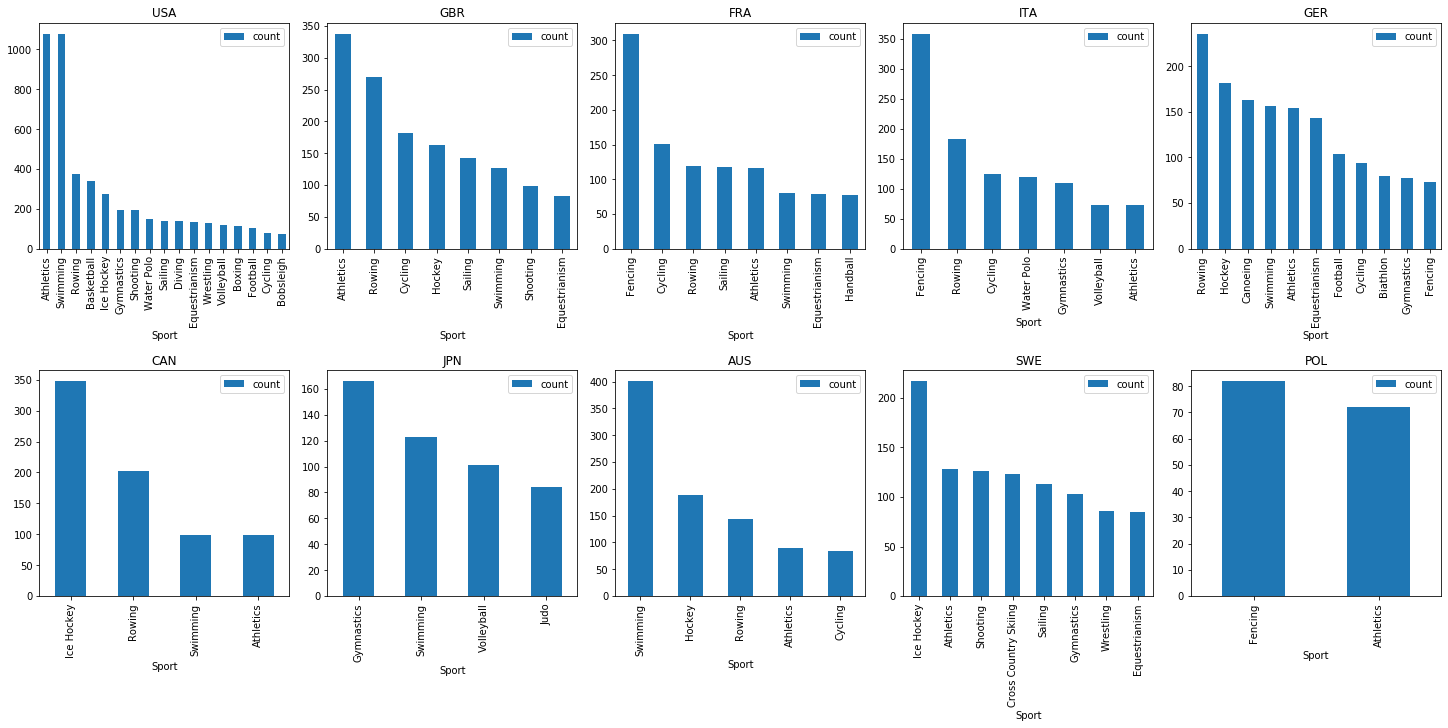

In [463]:
fig, axes = plt.subplots(nrows = 2, ncols=5, constrained_layout=True)
col=0
row=0
for c in top10.NOC:
    country= c
    if col==5:
        row = row+1
        col=0
    c = countrymedal[countrymedal['NOC']==c]
    c.plot(ax = axes[row,col], title = country, x = 'Sport',kind='bar',rot=90)
    col = col+1
    ax
fig
fig.savefig("medals")

### The country that has the most medal for the hotest 30 sports 

In [478]:
medaldf 
sportmedal = pysqldf("SELECT NOC, Sport, COUNT(Medal) AS count FROM medaldf WHERE Sport IN (SELECT Sport FROM hot_sports) GROUP BY Sport, NOC ORDER BY count DESC")
sportmedal 

,NOC,Sport,count
0,USA,Athletics,1080
1,USA,Swimming,1078
2,AUS,Swimming,401
3,USA,Rowing,375
4,ITA,Fencing,359
...,...,...,...
1100,SVK,Wrestling,1
1101,SYR,Wrestling,1
1102,TJK,Wrestling,1
1103,TUN,Wrestling,1


In [482]:
pysqldf("SELECT Sport, NOC, MAX(count) as the_most_medal FROM sportmedal GROUP BY Sport ORDER BY the_most_medal DESC")

,Sport,NOC,the_most_medal
0,Athletics,USA,1080
1,Swimming,USA,1078
2,Rowing,USA,375
3,Fencing,ITA,359
4,Ice Hockey,CAN,348
5,Basketball,USA,341
6,Gymnastics,URS,288
7,Hockey,NED,255
8,Shooting,USA,193
9,Cycling,GBR,182


### The number of medals top 10 countries got since 2000

In [492]:
pysqldf("SELECT Year, NOC, count(Medal) as medals FROM medaldf WHERE NOC IN (SELECT NOC FROM top10) GROUP BY NOC, Year ORDER BY NOC, Year")

,Year,NOC,medals
0,1896,AUS,3
1,1900,AUS,6
2,1904,AUS,4
3,1906,AUS,3
4,1920,AUS,7
...,...,...,...
312,2008,USA,317
313,2010,USA,97
314,2012,USA,248
315,2014,USA,64


In [502]:
mpl.rcParams['figure.figsize'] = (20,10)

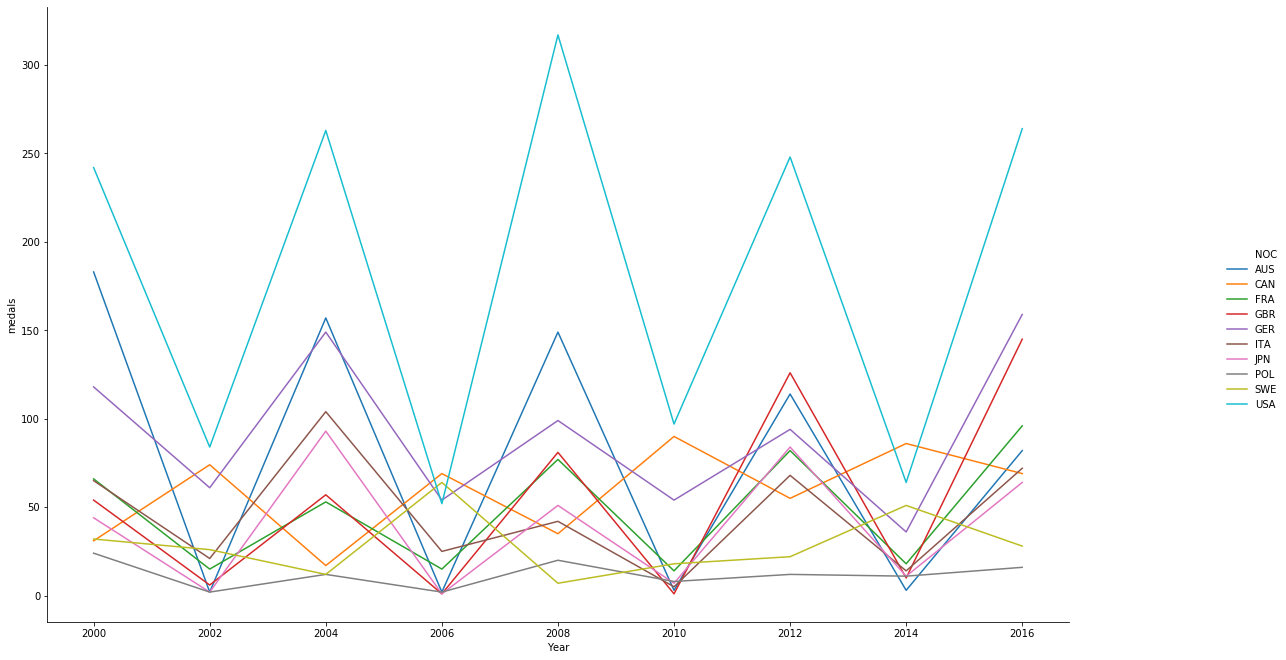

In [511]:
year_medal_10 = pysqldf("SELECT Year, NOC, count(Medal) as medals FROM medaldf WHERE NOC IN (SELECT NOC FROM top10) AND Year>=2000 GROUP BY NOC, Year ORDER BY NOC, Year")
ax = sns.relplot(x="Year", y="medals", hue = "NOC", estimator=None, kind= "line", data=year_medal_10, )  
#plt.show()
ax.fig.set_size_inches(20,10)
plt.savefig("year_medal_10",bbox_inches = 'tight')

### The number of medals China got since 2000

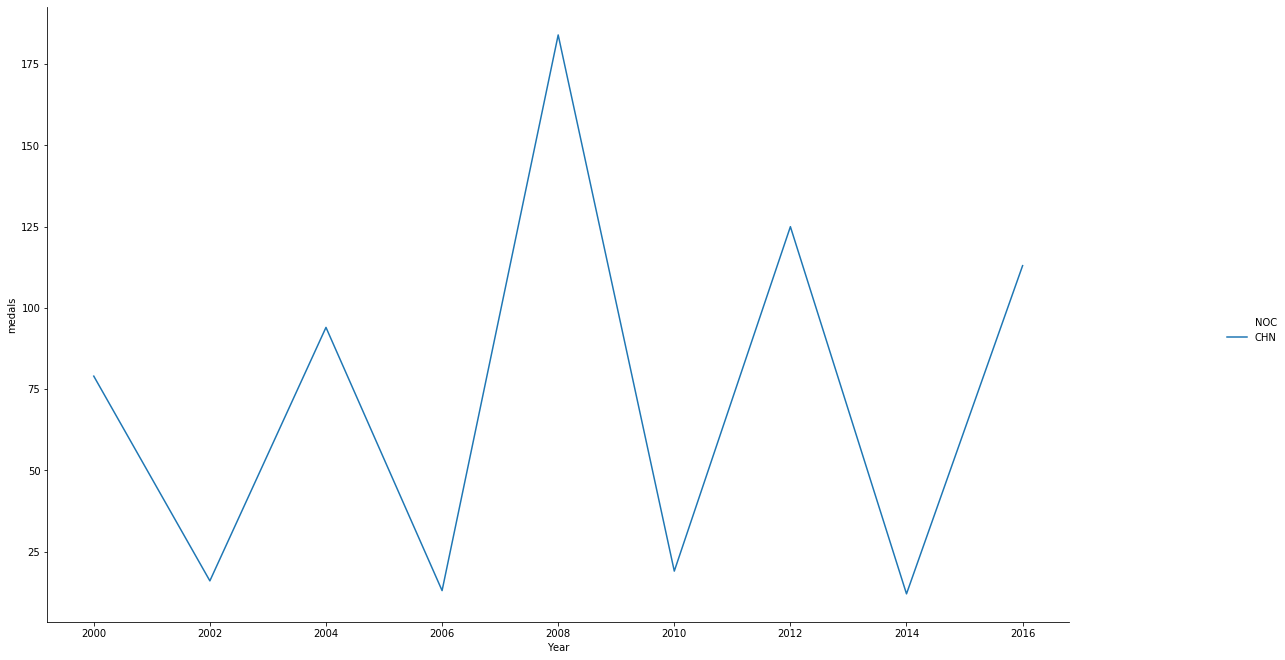

In [513]:
year_medal_china = pysqldf("SELECT Year, NOC, count(Medal) as medals FROM medaldf WHERE NOC =='CHN' AND Year>=2000 GROUP BY Year ORDER BY NOC, Year")
ax = sns.relplot(x="Year", y="medals", hue = "NOC", estimator=None, kind= "line", data=year_medal_china )  
#plt.show()
ax.fig.set_size_inches(20,10)
plt.savefig("year_medal_china",bbox_inches = 'tight')